In [6]:
import numpy as np
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
from numpy.fft import fft, fftshift
from scipy import signal
from scipy import fftpack
import scipy

In [29]:
path = r'D:\Education\TUM\master_thesis\data\sf2048_3072_1_5s\subset'                   
data_1min = glob.glob(os.path.join(path, "*.csv"))
len(data_1min)

sampling_rate = 2048
gesture_size = 3072 #each gesture records 1.5 seconds
time_ms = (1/sampling_rate) * 1000 #sampling time in ms
nfft = 128 #window length -> 256 samples - 125 ms and 128 samples - 62.5ms
overlap = 112 #87.5% overlapping [128 - 112ms and 256 - 224ms]
zp =  0
T_sample = 1.5 #in seconds

In [30]:
def sample_gesture(df,tail):

    for i in range(0,len(df)-1,gesture_size):
        
        buf = df["I"][i:i+gesture_size]
        calc_spectogram(buf,tail)

In [49]:
def calc_spectogram(buf,tail):
    f, t, Sx = signal.spectrogram(buf-np.mean(buf), fs=sampling_rate, window='hanning',
                                      nperseg=nfft, noverlap=overlap,
                                      detrend=False,return_onesided=False, scaling='spectrum')

    fig, ax = plt.subplots()
    
    #ax.pcolormesh(t, f / 1000, 10 * np.log10(Sx), cmap='viridis')

    ax.pcolormesh(t, fftshift(f/1000), fftshift(10 * np.log10(Sx), axes=0), shading='gouraud')
    ax.set_ylabel('Frequency [kHz]')
    ax.set_xlabel('Time [s]');
    ax.set_title(tail[17:-4]);
    fig.savefig(tail[17:-4]+'.png')

30721
front_and_back


d:\education\tum\master_thesis\tum_git_project\my_env\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


30721
nothing


d:\education\tum\master_thesis\tum_git_project\my_env\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
d:\education\tum\master_thesis\tum_git_project\my_env\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
d:\education\tum\master_thesis\tum_git_project\my_env\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the s

30721
tick
30721
up_and_down


d:\education\tum\master_thesis\tum_git_project\my_env\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


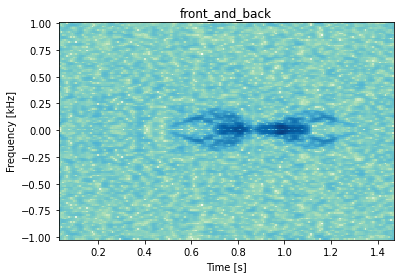

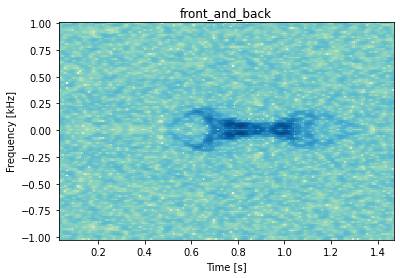

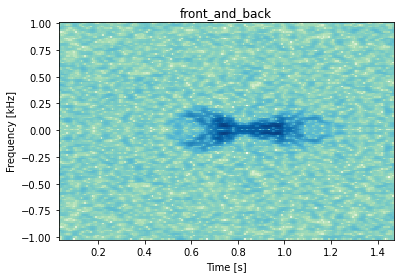

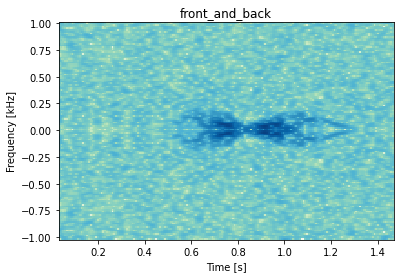

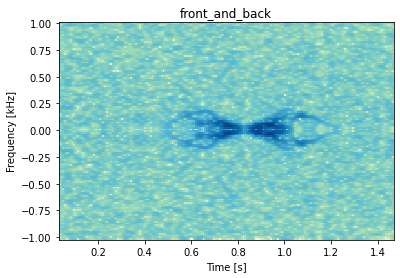

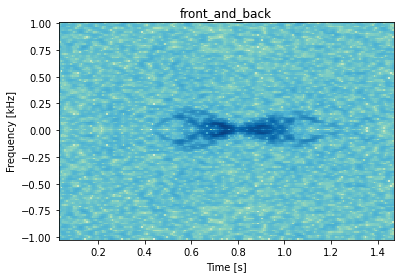

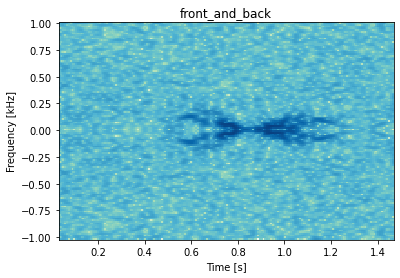

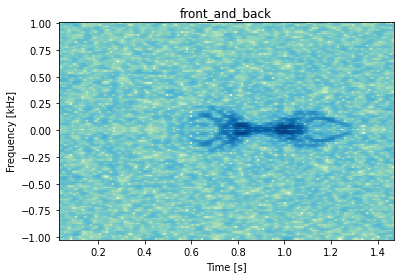

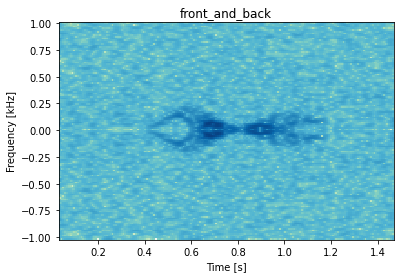

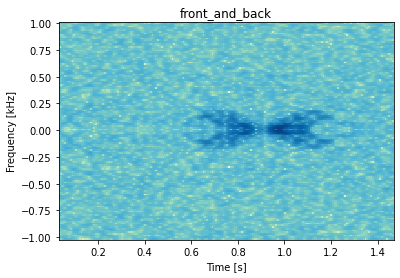

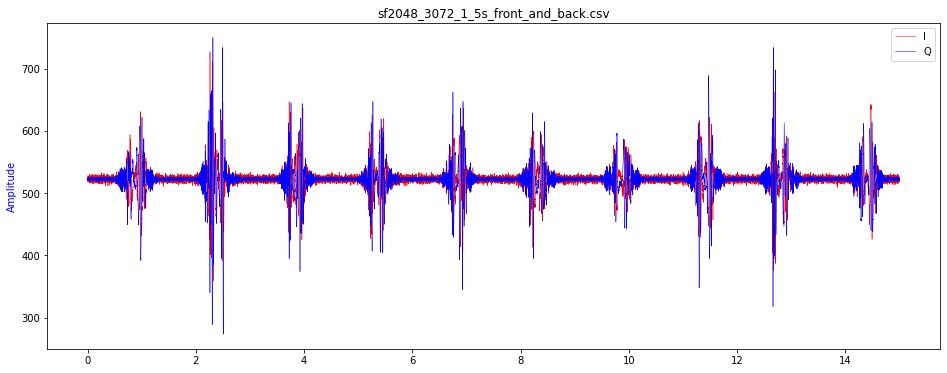

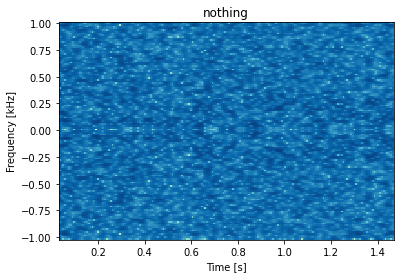

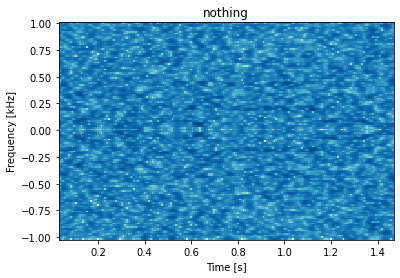

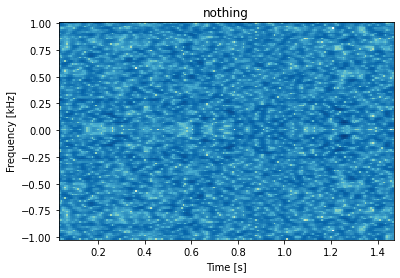

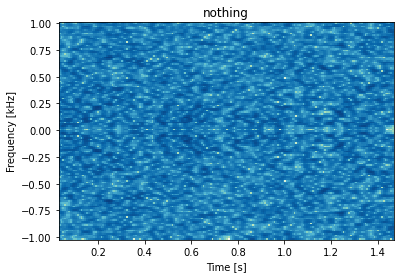

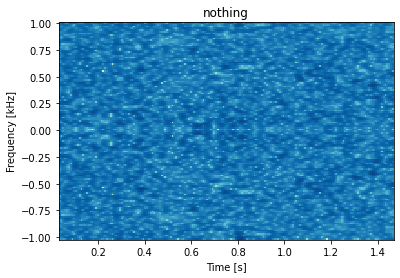

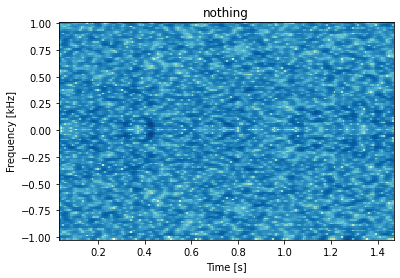

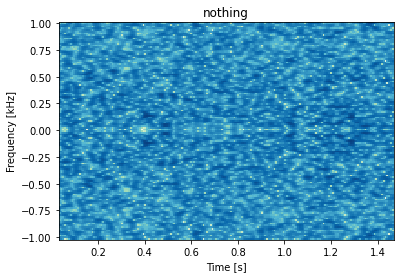

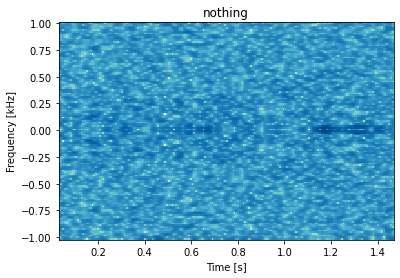

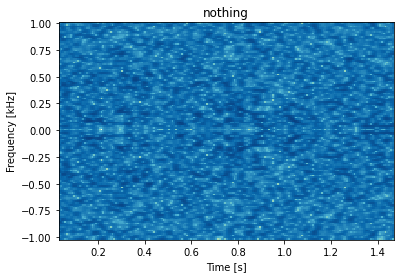

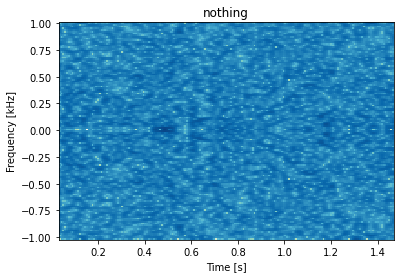

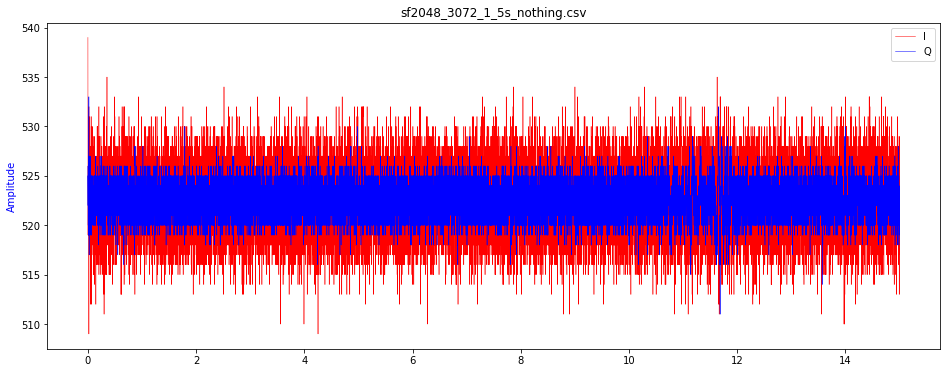

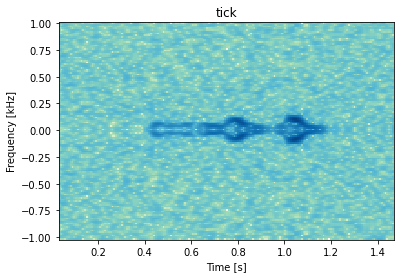

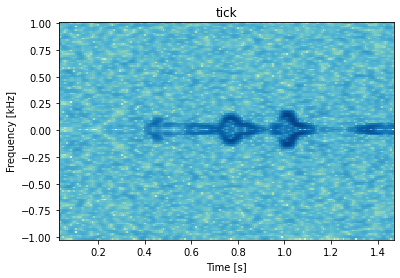

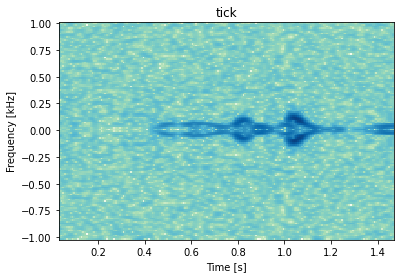

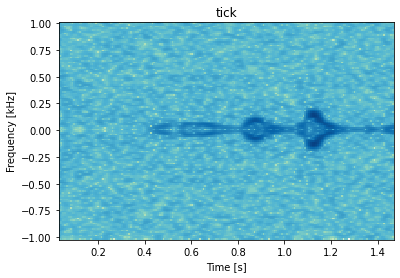

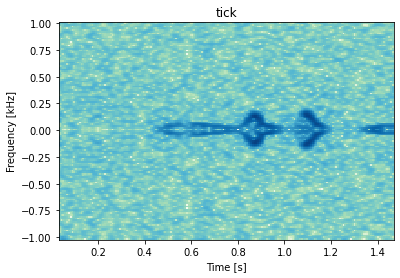

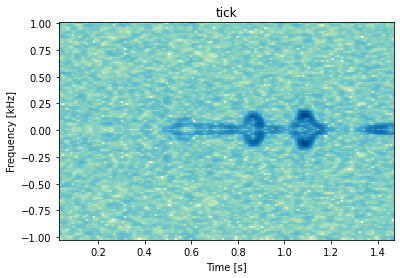

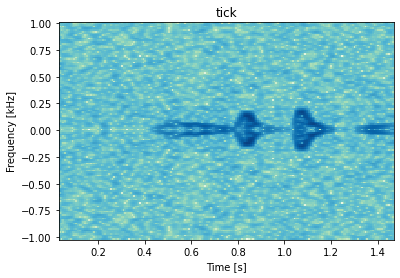

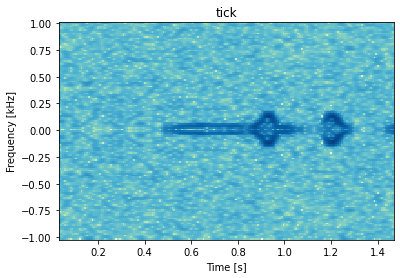

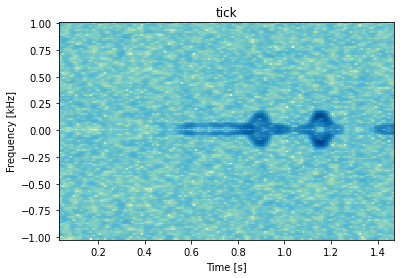

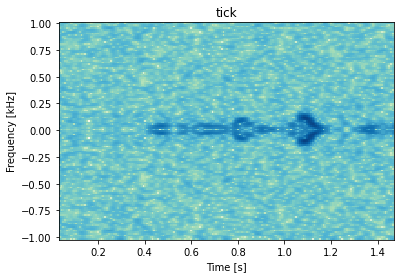

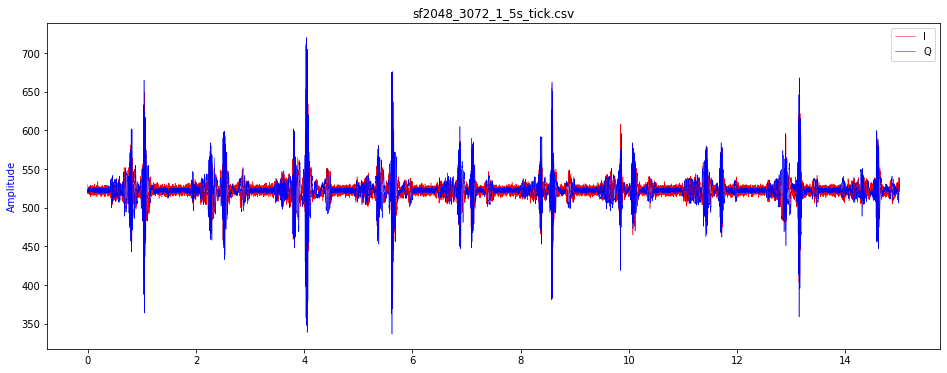

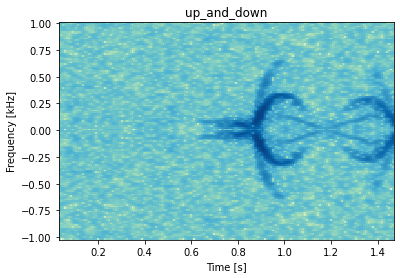

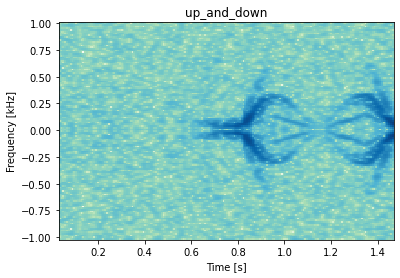

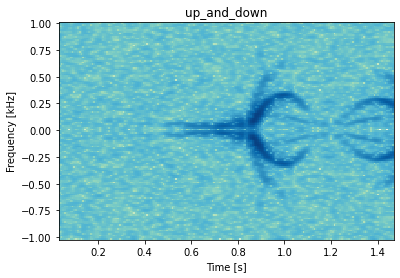

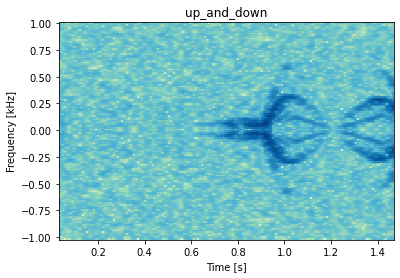

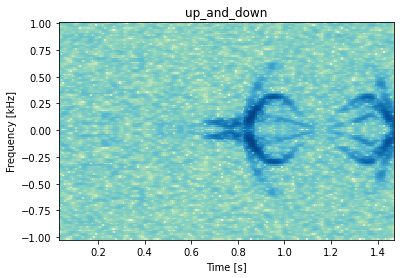

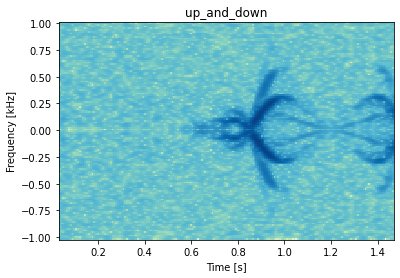

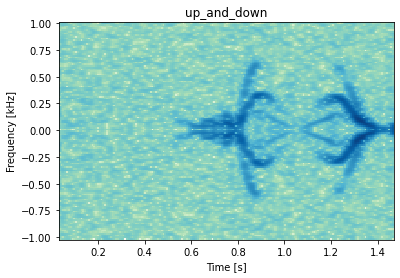

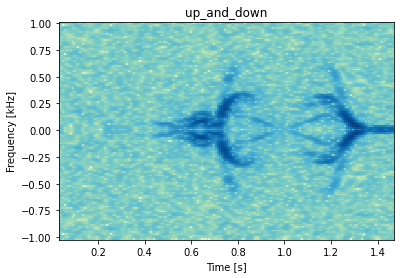

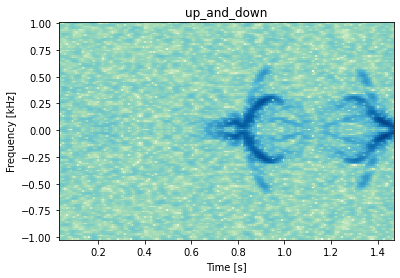

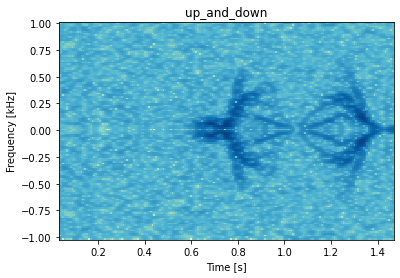

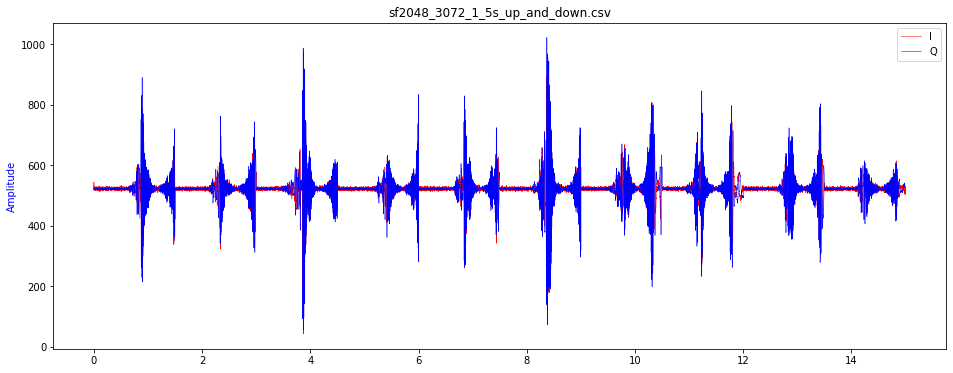

In [50]:
for fileidx in range(len(data_1min)):
    df = pd.read_csv(data_1min[fileidx], index_col=None, header=0)
    head, tail = os.path.split(data_1min[fileidx])
    #df['t'] = range(0, len(df),time_ms)
    
    l2 = 2*gesture_size
    l1 = 1 
    df = df.drop(range(l1,l2))
    print(len(df))
    
    df['t'] = np.linspace(0,15,len(df)) #10 samples -> 15 seconds
    print(tail[17:-4])
    sample_gesture(df,tail)
    
  
    fig, ax1 = plt.subplots(figsize=(16,6))
    ax1.plot(df["t"], df["I"], label="I", color="red", linewidth=0.5)
    ax1.plot(df["t"], df["Q"], label="Q", color="blue", linewidth=0.5)
    ax1.set_ylabel(r"Amplitude", fontsize=10, color="blue")
    ax1.set_title(tail);
    ax1.legend()